<a href="https://colab.research.google.com/github/mjtomczyk/mjtomczyk/blob/main/ML/credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br/>
<br/>

# <center> **Opis zadania** <center/>

## **_Wprowadzenie_**

Duża konkurencja i presja na zmniejszenie marż kredytowych przy jednoczesnej obawie, o jakość portfela kredytowego oraz nowe regulacje ostrożnościowe zmusiły instytucje finansowe do weryfikacji modeli scoringowych oraz procedur kredytowych.
Jako konsultant zatrudniony w firmie doradczej przydzielono Ci zadanie przeanalizowania danych oraz zbudowania modelu scoringowego klientów detalicznych dla banku „Miły Kredyt”.

Miły Kredyt prowadzi działalność w zakresie usług finansowych. Oferta banku skierowana jest przede wszystkim do klientów detalicznych, obejmuje jednak również propozycje dla podmiotów gospodarczych. Silna pozycja rynkowa jest efektem wieloletniej pracy w dziedzinie sprzedaży ratalnej. Wysoka dynamika sprzedaży już od wielu lat zapewnia bankowi czołowe miejsce na liście najlepiej rozwijających się banków detalicznych w Polsce.

Po przeprowadzonej analizie spółka Miły Kredyt stwierdziła, że 30% liczby kredytów przestało być spłacanych. W związku z tym uznano, że funkcjonujący dotychczas model nie działa poprawnie oraz zdecydowano się na wsparcie firmy zewnętrznej w celu budowy nowego modelu.

## **_Zadania_**
Twoim zadaniem jest przygotowanie prezentacji w języku angielskim dla Zarządu spółki Miły Kredyt, ponieważ część członków Zarządu nie posługuje się językiem polskim.

Prezentacja powinna przedstawiać wyniki i wnioski z następujących etapów:
1. Porównanie czterech wybranych typów modeli scoringowych klienta (np. różne rodzaje
regresji, analiza dyskryminacyjna) biorąc pod uwagę ich wady, zalety, złożoność
implementacji a także adekwatność dla portfela detalicznego.
2. Analiza struktury i jakości danych historycznych.
3. Budowa wybranego modelu (w oparciu o analizę przeprowadzoną w punkcie pierwszym)
wraz z opisem procesu i kroków, które doprowadziły do powstania modelu.
4. Walidacja modelu i backtesting.
5. Opracowanie schematu aplikacji wyników do procesu biznesowego (scoru).
6. Wnioski.
7. Bibliografia (materiały, na podstawie, których został opracowany model).
Zarząd zażyczył sobie również raport lub plik z obliczeniami dotyczącymi budowy modelu i sprawdzenia danych (w przypadku, gdy do obliczeń zostanie użyty Excel lub inny ogólnodostępny program obliczeniowy, np. R może to być raport w postaci pliku Word lub plik z obliczeniami, w pozostałych przypadkach powinien to być raport w postaci pliku Word).

## **_Charakterystyka danych_**
Miły Kredyt udostępnił historyczną bazę danych swoich kredytobiorców. Baza została przekazana w formie arkusza kalkulacyjnego Excel, w którym znajdują się dwie zakładki: pierwsza z danymi oraz druga z opisami zmiennych i wartościami, jakie mogą przyjmować poszczególne zmienne. Dane obejmują 1.000 kredytów, które rok temu były w portfelu banku, część z nich przestała być terminowo spłacana. Oprócz informacji o tym czy kredyt jest spłacany, w bazie znajduje się dwadzieścia innych zmiennych charakteryzujących kredytobiorcę. W związku z ustawą o ochronie danych osobowych dane personalne klientów nie zostały załączone.


In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
credit = pd.read_csv('gdrive/My Drive/credit.csv')

In [ ]:
credit.head()

,default,balance,duration,prev_pay,purpose,credit,savings,cur_emp,rate,ms/s,...,liv_plac,asset,age,fur_cred,home,no_cred,occupation,people,telephone,frgn
0,1,1,8,4,2,8,1,2,4,1,...,4,2,1,3,1,1,3,1,0,1
1,1,1,9,4,0,6,1,3,2,3,...,2,1,2,3,1,2,3,2,0,1
2,1,2,9,2,9,9,2,4,2,2,...,4,1,1,3,1,1,2,1,0,1
3,1,1,9,4,0,7,1,3,3,3,...,2,1,2,3,1,2,2,2,0,0
4,1,1,9,4,0,7,1,3,4,3,...,4,2,2,1,2,2,2,1,0,0


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   default     1000 non-null   int64
 1   balance     1000 non-null   int64
 2   duration    1000 non-null   int64
 3   prev_pay    1000 non-null   int64
 4   purpose     1000 non-null   int64
 5   credit      1000 non-null   int64
 6   savings     1000 non-null   int64
 7   cur_emp     1000 non-null   int64
 8   rate        1000 non-null   int64
 9   ms/s        1000 non-null   int64
 10  guarantors  1000 non-null   int64
 11  liv_plac    1000 non-null   int64
 12  asset       1000 non-null   int64
 13  age         1000 non-null   int64
 14  fur_cred    1000 non-null   int64
 15  home        1000 non-null   int64
 16  no_cred     1000 non-null   int64
 17  occupation  1000 non-null   int64
 18  people      1000 non-null   int64
 19  telephone   1000 non-null   int64
 20  frgn        1000 non-null   int

In [ ]:
credit.describe()

,default,balance,duration,prev_pay,purpose,credit,savings,cur_emp,rate,ms/s,...,liv_plac,asset,age,fur_cred,home,no_cred,occupation,people,telephone,frgn
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.700000,2.577000,7.315000,2.54500,2.828000,6.640000,2.105000,3.384000,2.973000,2.46400,...,2.845000,2.358000,2.18300,2.675000,1.928000,1.407000,2.904000,1.155000,0.404000,0.963000
std,0.458487,1.257638,1.870635,1.08312,2.744439,1.519444,1.580023,1.208306,1.118715,0.98472,...,1.103718,1.050209,0.85102,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,0.000000,1.000000,1.000000,0.00000,0.000000,2.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,7.000000,2.00000,1.000000,6.000000,1.000000,3.000000,2.000000,1.00000,...,2.000000,1.000000,2.00000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000
50%,1.000000,2.000000,8.000000,2.00000,2.000000,7.000000,1.000000,3.000000,3.000000,3.00000,...,3.000000,2.000000,2.00000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000
75%,1.000000,4.000000,9.000000,4.00000,3.000000,8.000000,3.000000,5.000000,4.000000,3.00000,...,4.000000,3.000000,3.00000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000
max,1.000000,4.000000,9.000000,4.00000,10.000000,9.000000,5.000000,5.000000,4.000000,4.00000,...,4.000000,4.000000,5.00000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000


Wszystkie zmienne to zmienne kategoryczne. Dla niektórych zmiennych tj. telephone i frgn kategorie zostały zmienione z użyciem binarnego atrybutu (1 - true, 0 - false) w miejce pierwotnych wartości.

Trudności:
balance - niski limit
age - niesymetryczne dla przedziału 26-64, sugerowane przedziały <=24, 25-29,30-39, 40-49, 50-59, 60-64, >=65

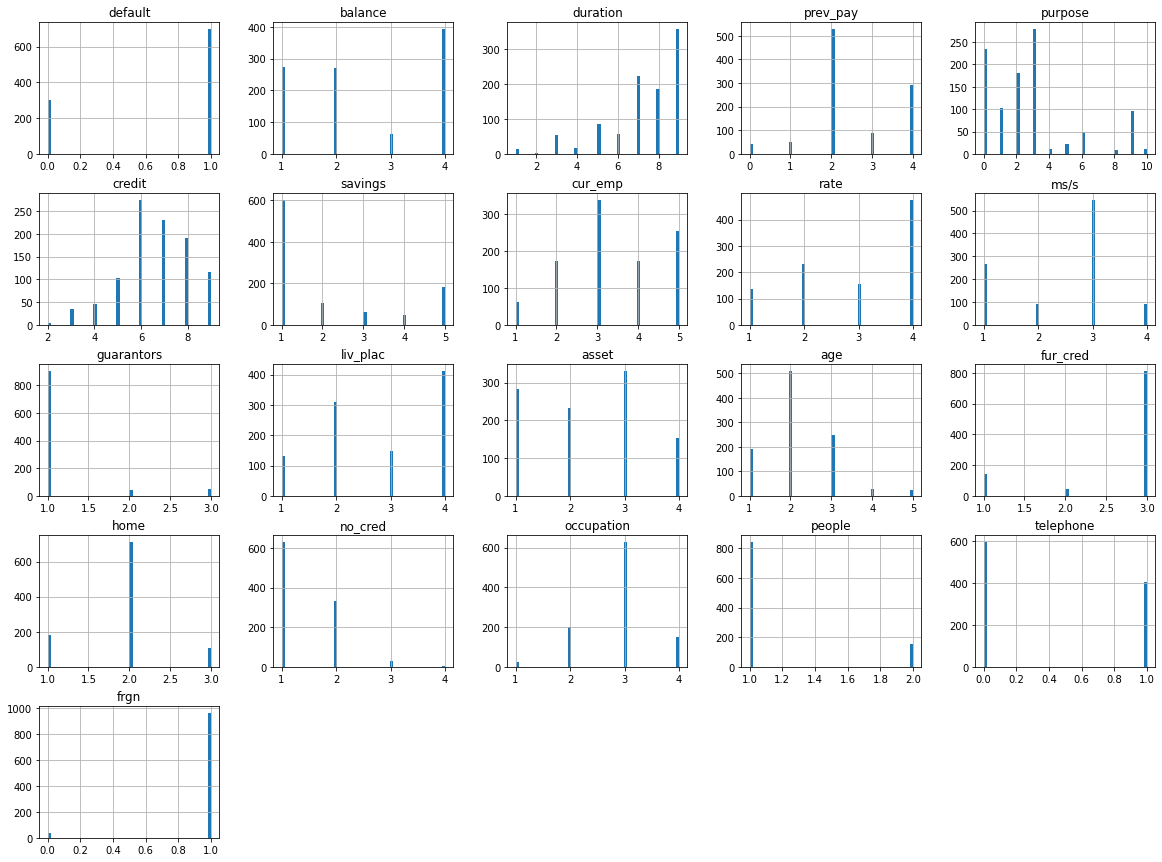

In [ ]:
import matplotlib.pyplot as plt
credit.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_set, test_set = train_test_split(credit, test_size=0.2, random_state=42)

In [ ]:
corr_matrix = credit.corr()

In [ ]:
corr_matrix["default"].sort_values(ascending=False)

default       1.000000
balance       0.350847
prev_pay      0.228785
duration      0.200163
savings       0.178943
cur_emp       0.116002
fur_cred      0.109844
credit        0.099145
age           0.097232
ms/s          0.066958
no_cred       0.045732
telephone     0.036466
guarantors    0.025137
home          0.018119
people        0.003015
liv_plac     -0.002967
purpose      -0.017979
occupation   -0.032735
rate         -0.072404
frgn         -0.082079
asset        -0.142612
Name: default, dtype: float64

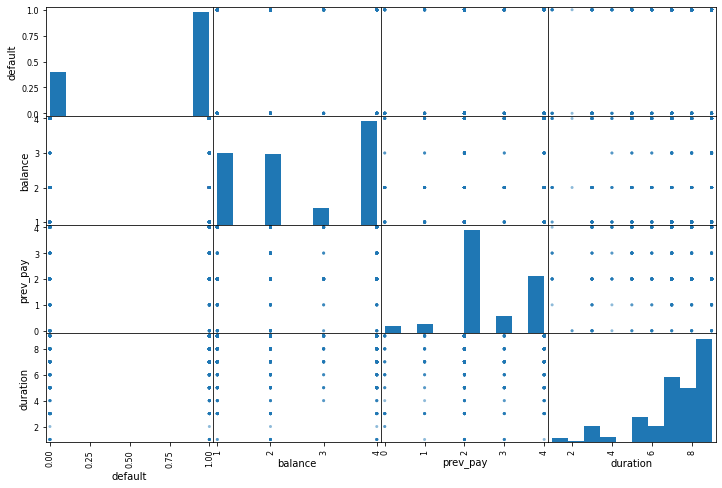

In [ ]:
from pandas.plotting import scatter_matrix
attributes = ["default", "balance", "prev_pay", "duration"]
scatter_matrix(credit[attributes], figsize=(12,8))
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(credit, credit["default"]):
  strat_train_set = credit.loc[train_index]
  strat_test_set = credit.loc[test_index]

In [ ]:
credit = strat_train_set.copy()

In [ ]:
strat_test_set["default"].value_counts()/len(strat_test_set)

1    0.7
0    0.3
Name: default, dtype: float64

In [ ]:
credit = strat_train_set.drop("default", axis=1)
credit_labels = strat_train_set["default"].copy()

In [ ]:
credit.head()

,balance,duration,prev_pay,purpose,credit,savings,cur_emp,rate,ms/s,guarantors,liv_plac,asset,age,fur_cred,home,no_cred,occupation,people,telephone,frgn
485,4,9,4,9,8,1,3,3,1,1,2,1,2,3,2,2,3,1,0,1
510,4,9,4,0,7,3,3,1,4,1,2,3,1,3,2,1,3,1,0,1
7,1,9,4,0,8,1,2,2,3,1,4,1,3,3,2,1,2,2,0,0
630,1,8,4,2,8,1,3,4,2,1,3,2,1,3,1,2,3,1,0,1
590,1,9,2,2,7,1,3,2,3,1,2,1,2,3,2,1,3,1,0,1


In [ ]:
credit_labels.head()

485    1
510    1
7      1
630    1
590    1
Name: default, dtype: int64

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(credit, credit_labels)

LinearRegression()

$\displaystyle \operatorname {RMSE} ={\sqrt {\frac {\sum _{t=1}^{m}({\hat {y}}_{t}-y_{t})^{2}}{m}}}$

In [ ]:
some_data = credit.iloc[:5]
some_labels = credit_labels.iloc[:5]
print("Forecast: ", lin_reg.predict(some_data))
print("Labels: ", list(some_labels))

Forecast:  [0.95085819 1.10932138 0.88667367 0.46110001 0.62505808]
Labels:  [1, 1, 1, 1, 1]


In [ ]:
from sklearn.metrics import mean_squared_error
credit_predictions = lin_reg.predict(credit)
lin_mse = mean_squared_error(credit_labels, credit_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.40428323317560044

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(credit, credit_labels)

DecisionTreeRegressor()

In [ ]:
credit_predictions_tree = tree_reg.predict(credit)
tree_mse = mean_squared_error(credit_labels, credit_predictions_tree)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, credit, credit_labels, 
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [ ]:
def display_scores(scores):
  print("Scores: ", scores)
  print("Mean: ", scores.mean())
  print("SD: ", scores.std())
display_scores(tree_rmse_scores)

Scores:  [0.57008771 0.57008771 0.5809475  0.60207973 0.57008771 0.52440442
 0.52440442 0.698212   0.53619026 0.57008771]
Mean:  0.5746589196165781
SD:  0.04761434768120929


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest_reg = RandomForestRegressor()
forest_reg.fit(credit, credit_labels)
forest_predictions = forest_reg.predict(credit)
forest_mse = mean_squared_error(credit_labels, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.15311474455453333

In [ ]:
scores = cross_val_score(forest_reg, credit, credit_labels, 
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores:  [0.41693675 0.43146553 0.4090492  0.40968586 0.39739936 0.34955865
 0.41632169 0.48496134 0.39839208 0.39562767]
Mean:  0.4109398113764803
SD:  0.03211458276021642


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [i for i in range(1, 21)]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [i for i in range (2, 21, 2)]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(credit, credit_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13, 14, 15, 16, 17, 18, 19, 20],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False],
                          'max_features': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

0.49581582602145063 {'max_features': 1, 'n_estimators': 3}
0.43518674152597986 {'max_features': 1, 'n_estimators': 10}
0.4244702580864766 {'max_features': 1, 'n_estimators': 30}
0.4788585966186214 {'max_features': 2, 'n_estimators': 3}
0.436033255612459 {'max_features': 2, 'n_estimators': 10}
0.41535292891173353 {'max_features': 2, 'n_estimators': 30}
0.48030661503298544 {'max_features': 3, 'n_estimators': 3}
0.4346262762420146 {'max_features': 3, 'n_estimators': 10}
0.419240384505119 {'max_features': 3, 'n_estimators': 30}
0.462481230850387 {'max_features': 4, 'n_estimators': 3}
0.4258814389005466 {'max_features': 4, 'n_estimators': 10}
0.418791250041248 {'max_features': 4, 'n_estimators': 30}
0.48333333333333334 {'max_features': 5, 'n_estimators': 3}
0.43107423954581187 {'max_features': 5, 'n_estimators': 10}
0.4203801189928521 {'max_features': 5, 'n_estimators': 30}
0.494694069321861 {'max_features': 6, 'n_estimators': 3}
0.43357525298383903 {'max_features': 6, 'n_estimators': 10}
0

In [ ]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.13280541, 0.08606237, 0.06417291, 0.07153467, 0.0664511 ,
       0.06100674, 0.06031886, 0.05367602, 0.04755012, 0.02952871,
       0.04982347, 0.06033711, 0.04567045, 0.02695323, 0.03032573,
       0.02543832, 0.04141268, 0.01663289, 0.02594428, 0.00435494])

In [ ]:
sorted(zip(feature_importances, credit.columns), reverse=True)

[(0.13280540629410564, 'balance'),
 (0.08606236663243048, 'duration'),
 (0.07153467459767424, 'purpose'),
 (0.06645109929389471, 'credit'),
 (0.0641729138909272, 'prev_pay'),
 (0.061006743914072056, 'savings'),
 (0.06033710903834093, 'asset'),
 (0.060318863996666416, 'cur_emp'),
 (0.053676021743358324, 'rate'),
 (0.04982346531720178, 'liv_plac'),
 (0.04755011641370695, 'ms/s'),
 (0.04567045118538383, 'age'),
 (0.041412683478739595, 'occupation'),
 (0.030325729001153323, 'home'),
 (0.029528706023047937, 'guarantors'),
 (0.02695322930225012, 'fur_cred'),
 (0.02594427725248745, 'telephone'),
 (0.025438320381968582, 'no_cred'),
 (0.01663288627853888, 'people'),
 (0.004354935964051574, 'frgn')]

In [ ]:
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("default", axis=1)
y_test = strat_test_set["default"].copy()

final_predictions = final_model.predict(X_test)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [ ]:
final_rmse

0.38872298048295983

In [ ]:
from scipy import stats

In [ ]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([0.35210566, 0.42217617])